In [1]:
#Might be unnessesary since i created this in a python virtual environment.
#!pip install tensorflow netron
#pip install pydotplus
#pip install pydot
#pip install netron
#!pip install sklearn
#!pip install pandas

In [2]:
# Load libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np

from keras import models
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd

import matplotlib.pyplot as plt

import netron

2023-01-25 15:37:08.437658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 15:37:09.519808: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-25 15:37:09.519902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-25 15:37:09.519914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
#load data
df = pd.read_csv('./bank-additional-full.csv', sep=';')
df = df.dropna()
#cleans the data
data = df.drop('y', axis=1)
target = df['y']
target = np.where(target == 'yes', 1, 0)
data = pd.get_dummies(data, columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"])
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
# Load data and target
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=69)
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [5]:
# Builds the neural network and runs it
model = Sequential()
model.add(Dense(32, input_dim=data_train.shape[1], activation='relu', input_shape=(63,)))
model.add(Dense(32, input_dim=data_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(data_train, target_train, epochs=50, batch_size=16, validation_data=(data_test, target_test))

Epoch 1/50


2023-01-25 15:37:11.724256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-25 15:37:11.724289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jens-XPS-13-9370): /proc/driver/nvidia/version does not exist
2023-01-25 15:37:11.724834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2060/2060 [==============================] - 6s 3ms/step - loss: 0.2558 - accuracy: 0.9003 - val_loss: 0.2206 - val_accuracy: 0.9051
Epoch 2/50
2060/2060 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9096 - val_loss: 0.2083 - val_accuracy: 0.9057
Epoch 3/50
2060/2060 [==============================] - 3s 2ms/step - loss: 0.1959 - accuracy: 0.9107 - val_loss: 0.1895 - val_accuracy: 0.9118
Epoch 4/50
2060/2060 [==============================] - 4s 2ms/step - loss: 0.1897 - accuracy: 0.9135 - val_loss: 0.1942 - val_accuracy: 0.9103
Epoch 5/50
2060/2060 [==============================] - 4s 2ms/step - loss: 0.1857 - accuracy: 0.9136 - val_loss: 0.1849 - val_accuracy: 0.9127
Epoch 6/50
2060/2060 [==============================] - 4s 2ms/step - loss: 0.1824 - accuracy: 0.9159 - val_loss: 0.1832 - val_accuracy: 0.9121
Epoch 7/50
2060/2060 [==============================] - 4s 2ms/step - loss: 0.1819 - accuracy: 0.9165 - val_loss: 0.1840 - val_accuracy: 0.9124
Epo

In [6]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Get training and te
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

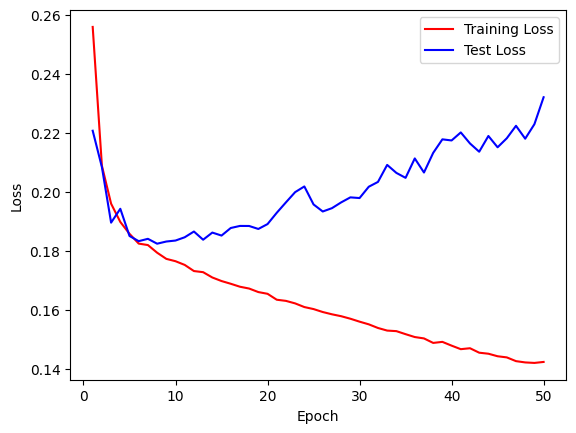

In [7]:
# Visualize loss history
plt.plot(epoch_count, training_loss, "r-")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

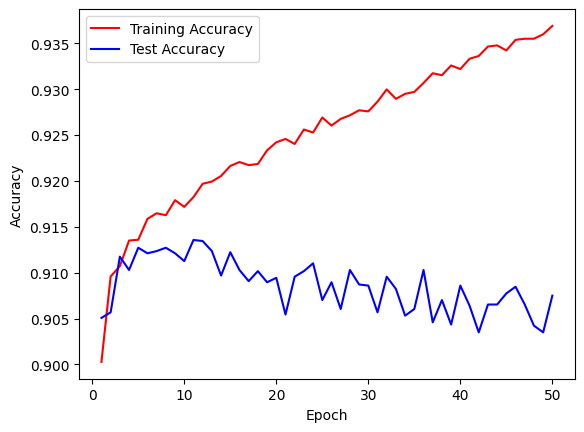

In [8]:
#Visualizes the accuracy
plt.plot(epoch_count, train_acc, "r-")
plt.plot(epoch_count, val_acc, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [9]:
# Starts an localhost that visualizes the Network architecture, using the open-source library netron
model.save('model.h5')
netron.start('model.h5')

Serving 'model.h5' at http://localhost:8080


('localhost', 8080)